In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import os
from scipy.spatial.transform import Rotation

```csv
time,type,0x,0y,0z,1x,1y,1z,2x,2y,2z,3x,3y,3z
1735187277.671097,handAnchor,-0.10635458,0.17098306,0.97951674,0.22988345,0.9626433,-0.14307722,-0.9673892,0.20995784,-0.1416877,0.2704359,-0.31129307,-0.13503955
1735187277.671097,indexFingerTipParent,1.0,-6.668772e-09,6.9894748e-09,1.5630066e-09,1.0,1.03905355e-08,1.1304779e-08,1.7694923e-08,1.0000001,-0.0231947,2.6583672e-05,-0.00045344234
1735187277.671097,indexFingerTipAnchor,0.9979028,-0.04196099,0.049288888,0.04168005,0.9991087,0.006714134,-0.049526695,-0.00464564,0.9987622,-0.18748423,0.0011922366,0.01789693
```

In [37]:
def matrix_to_quaternion(matrix):
    q = Rotation.from_matrix(matrix).as_quat()
    return q

def output_file(df: pd.DataFrame,time: float):
    # それぞれの座標をクォータニオンに変換
    quat = df.apply(lambda x: matrix_to_quaternion([[x['0x'], x['0y'], x['0z']], [x['1x'], x['1y'], x['1z']], [x['2x'], x['2y'], x['2z']]]), axis=1)
    df['t'] = df['time']
    df['x'] = quat.apply(lambda x: x[0])
    df['y'] = quat.apply(lambda x: x[1])
    df['z'] = quat.apply(lambda x: x[2])
    df['w'] = quat.apply(lambda x: x[3])

    # out/{time}/{type}/{vector3|quaternion}.csv に保存
    if not os.path.exists(f'out/{time}'):
        os.makedirs(f'out/{time}')
    if not os.path.exists(f'out/{time}/{df["type"].iloc[0]}'):
        os.makedirs(f'out/{time}/{df["type"].iloc[0]}')
    cpdf = df[['t','3x','3y','3z']]
    cpdf.columns = ['t','x','y','z']
    cpdf.to_json(f'out/{time}/{df["type"].iloc[0]}/vector3.json', orient='records')
    df[['t', 'x', 'y', 'z', 'w']].to_json(f'out/{time}/{df["type"].iloc[0]}/quaternion.json', orient='records')

    return df

In [38]:
"""csv
time,type,0x,0y,0z,1x,1y,1z,2x,2y,2z,3x,3y,3z
1735187277.671097,handAnchor,-0.10635458,0.17098306,0.97951674,0.22988345,0.9626433,-0.14307722,-0.9673892,0.20995784,-0.1416877,0.2704359,-0.31129307,-0.13503955
1735187277.671097,indexFingerTipParent,1.0,-6.668772e-09,6.9894748e-09,1.5630066e-09,1.0,1.03905355e-08,1.1304779e-08,1.7694923e-08,1.0000001,-0.0231947,2.6583672e-05,-0.00045344234
1735187277.671097,indexFingerTipAnchor,0.9979028,-0.04196099,0.049288888,0.04168005,0.9991087,0.006714134,-0.049526695,-0.00464564,0.9987622,-0.18748423,0.0011922366,0.01789693
"""

time = 1735198068.64531
df = pd.read_csv(f'data/{time}.csv')

# 前10個消す
df = df.iloc[20:]

# type == "handAnchor" のみ抽出
df_handAnchor = df[df['type'] == 'handAnchor']
df_handAnchor.sort_values('time', ascending=True)
df_contentEntity = df[df['type'] == 'contentEntity']
df_contentEntity.sort_values('time', ascending=True)
df_indexFingerTipParent = df[df['type'] == 'indexFingerTipParent']
df_indexFingerTipParent.sort_values('time', ascending=True)
df_indexFingerTipAnchor = df[df['type'] == 'indexFingerTipAnchor']
df_indexFingerTipAnchor.sort_values('time', ascending=True)

# 保存
output_file(df_handAnchor, time)
output_file(df_contentEntity, time)
output_file(df_indexFingerTipParent, time)
output_file(df_indexFingerTipAnchor, time)

/var/folders/rw/p_tycj2j4sggv0m5s9804w3c0000gn/T/ipykernel_63774/1306544115.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t'] = df['time']
/var/folders/rw/p_tycj2j4sggv0m5s9804w3c0000gn/T/ipykernel_63774/1306544115.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = quat.apply(lambda x: x[0])
/var/folders/rw/p_tycj2j4sggv0m5s9804w3c0000gn/T/ipykernel_63774/1306544115.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,time,type,0x,0y,0z,1x,1y,1z,2x,2y,2z,3x,3y,3z,t,x,y,z,w
23,1.735198e+09,indexFingerTipAnchor,0.923643,0.349328,0.157648,-0.352592,0.935746,-0.007700,-0.150208,-0.048473,0.987465,-0.178611,-0.025039,0.013303,1.735198e+09,-0.010394,0.078481,-0.178939,0.980670
27,1.735198e+09,indexFingerTipAnchor,0.921336,0.352301,0.164391,-0.357867,0.933761,0.004565,-0.151893,-0.063036,0.986385,-0.178464,-0.025363,0.012249,1.735198e+09,-0.017246,0.080686,-0.181168,0.979985
31,1.735198e+09,indexFingerTipAnchor,0.918020,0.363596,0.158233,-0.367512,0.930006,-0.004824,-0.148912,-0.053724,0.987390,-0.178110,-0.025873,0.012774,1.735198e+09,-0.012485,0.078416,-0.186657,0.979211
35,1.735198e+09,indexFingerTipAnchor,0.917393,0.365287,0.157975,-0.367944,0.929755,-0.013155,-0.151683,-0.046057,0.987356,-0.177826,-0.025755,0.012505,1.735198e+09,-0.008401,0.079068,-0.187222,0.979094
39,1.735198e+09,indexFingerTipAnchor,0.916698,0.365195,0.162167,-0.369509,0.929220,-0.003813,-0.152081,-0.056426,0.986756,-0.177592,-0.025762,0.011875,1.735198e+09,-0.013437,0.080258,-0.187642,0.978861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11067,1.735198e+09,indexFingerTipAnchor,0.999854,0.013078,0.010965,-0.013162,0.999884,0.007648,-0.010863,-0.007791,0.999911,-0.180418,-0.003649,0.023242,1.735198e+09,-0.003860,0.005457,-0.006560,0.999956
11071,1.735198e+09,indexFingerTipAnchor,0.999809,0.015220,0.012290,-0.015339,0.999836,0.009613,-0.012142,-0.009800,0.999878,-0.180509,-0.003832,0.023130,1.735198e+09,-0.004854,0.006108,-0.007640,0.999940
11075,1.735198e+09,indexFingerTipAnchor,0.999879,0.010401,0.011533,-0.010459,0.999933,0.004932,-0.011481,-0.005052,0.999921,-0.180557,-0.003519,0.023291,1.735198e+09,-0.002496,0.005754,-0.005215,0.999967
11079,1.735198e+09,indexFingerTipAnchor,0.999901,0.008035,0.011600,-0.008056,0.999966,0.001718,-0.011586,-0.001811,0.999931,-0.180645,-0.003348,0.023375,1.735198e+09,-0.000882,0.005797,-0.004023,0.999975


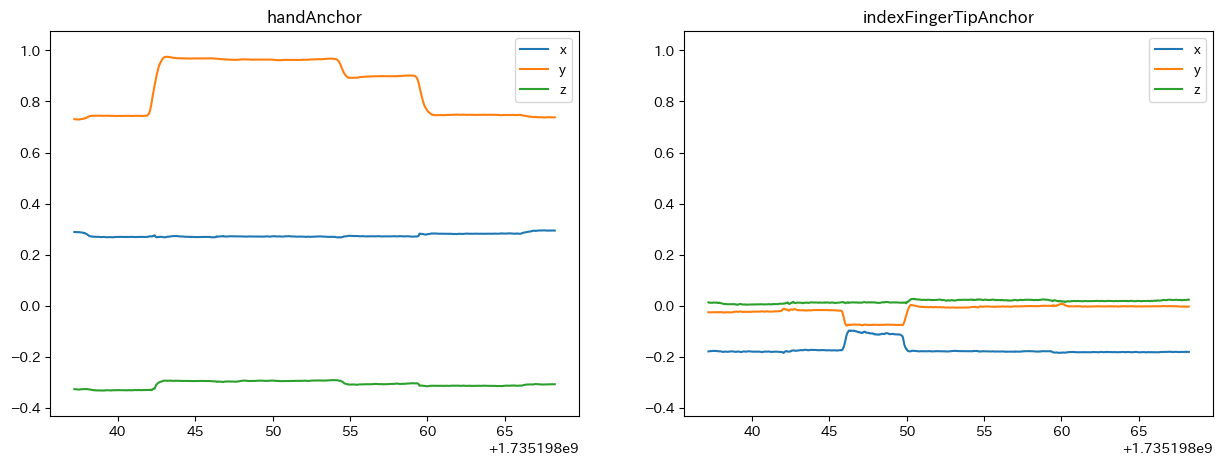

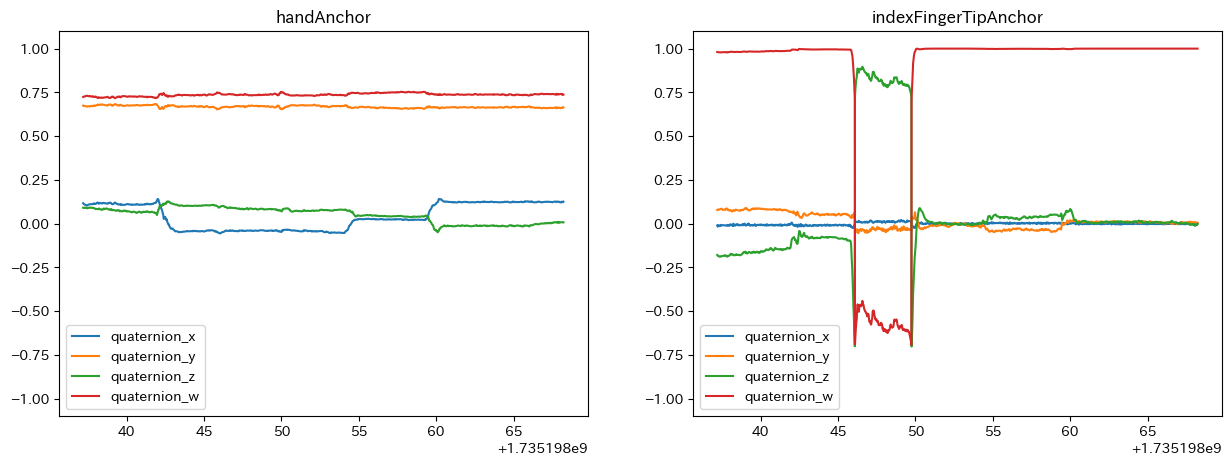

In [42]:
# typeごとに横に並べてプロット
# hamdAmchor の際材最小に合わせてグラフの範囲を決定
handanchor_max = df_handAnchor[['3x', '3y', '3z']].max().max() + 0.1
handanchor_min = df_handAnchor[['3x', '3y', '3z']].min().min() - 0.1
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(df_handAnchor['time'], df_handAnchor['3x'], label='x')
ax[0].plot(df_handAnchor['time'], df_handAnchor['3y'], label='y')
ax[0].plot(df_handAnchor['time'], df_handAnchor['3z'], label='z')
ax[0].legend()
ax[0].set_title('handAnchor')
ax[0].set_ylim(handanchor_min, handanchor_max)

# ax[1].plot(df_contentEntity['time'], df_contentEntity['3x'], label='x')
# ax[1].plot(df_contentEntity['time'], df_contentEntity['3y'], label='y')
# ax[1].plot(df_contentEntity['time'], df_contentEntity['3z'], label='z')
# ax[1].legend()
# ax[1].set_title('contentEntity')
# ax[1].set_ylim(handanchor_min, handanchor_max)

# ax[1].plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['3x'], label='x')
# ax[1].plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['3y'], label='y')
# ax[1].plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['3z'], label='z')
# ax[1].legend()
# ax[1].set_title('indexFingerTipParent')
# ax[1].set_ylim(handanchor_min, handanchor_max)

ax[1].plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['3x'], label='x')
ax[1].plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['3y'], label='y')
ax[1].plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['3z'], label='z')
ax[1].legend()
ax[1].set_title('indexFingerTipAnchor')
ax[1].set_ylim(handanchor_min, handanchor_max)
plt.show()

# typeごとにプロット
handanchor_max = 1.1
handanchor_min = - 1.1
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(df_handAnchor['time'], df_handAnchor['x'], label='quaternion_x')
ax[0].plot(df_handAnchor['time'], df_handAnchor['y'], label='quaternion_y')
ax[0].plot(df_handAnchor['time'], df_handAnchor['z'], label='quaternion_z')
ax[0].plot(df_handAnchor['time'], df_handAnchor['w'], label='quaternion_w')
ax[0].legend()
ax[0].set_title('handAnchor')
ax[0].set_ylim(handanchor_min, handanchor_max)

# ax[1].plot(df_contentEntity['time'], df_contentEntity['x'], label='quaternion_x')
# ax[1].plot(df_contentEntity['time'], df_contentEntity['y'], label='quaternion_y')
# ax[1].plot(df_contentEntity['time'], df_contentEntity['z'], label='quaternion_z')
# ax[1].plot(df_contentEntity['time'], df_contentEntity['w'], label='quaternion_w')
# ax[1].legend()
# ax[1].set_title('contentEntity')
# ax[1].set_ylim(handanchor_min, handanchor_max)

# ax[1].plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['x'], label='quaternion_x')
# ax[1].plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['y'], label='quaternion_y')
# ax[1].plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['z'], label='quaternion_z')
# ax[1].plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['w'], label='quaternion_w')
# ax[1].legend()
# ax[1].set_title('indexFingerTipParent')
# ax[2].set_ylim(handanchor_min, handanchor_max)

ax[1].plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['x'], label='quaternion_x')
ax[1].plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['y'], label='quaternion_y')
ax[1].plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['z'], label='quaternion_z')
ax[1].plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['w'], label='quaternion_w')
ax[1].legend()
ax[1].set_title('indexFingerTipAnchor')
ax[1].set_ylim(handanchor_min, handanchor_max)
plt.show()

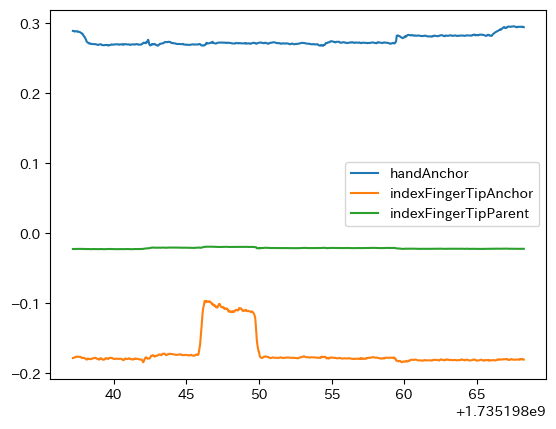

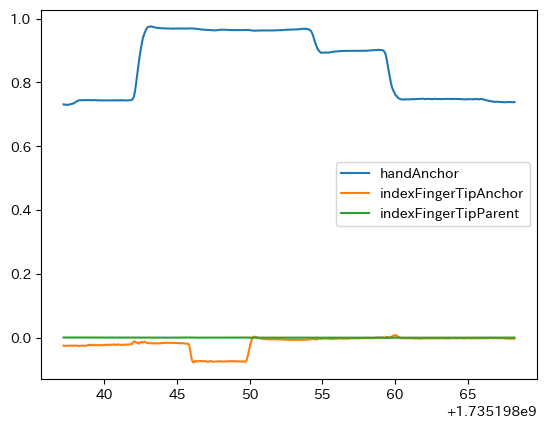

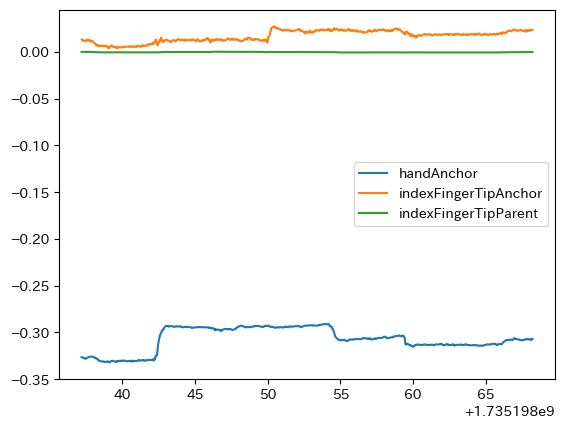

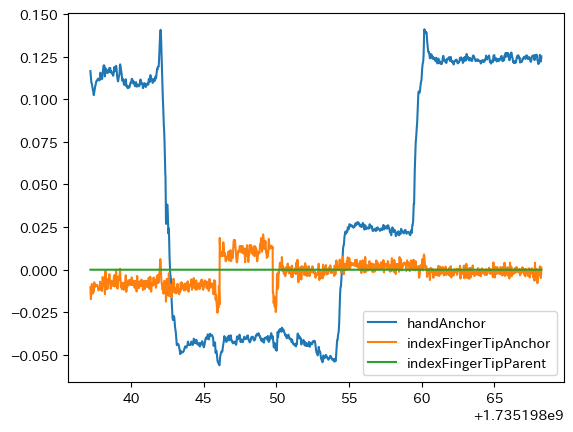

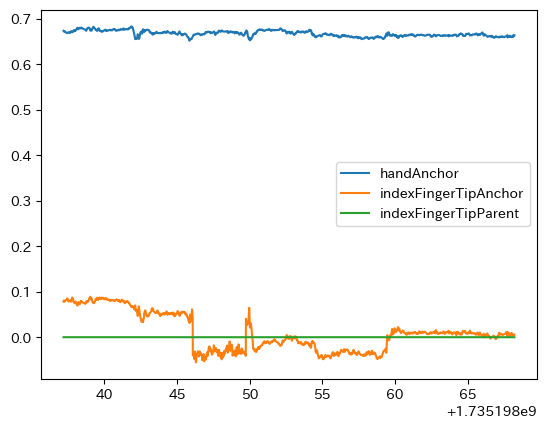

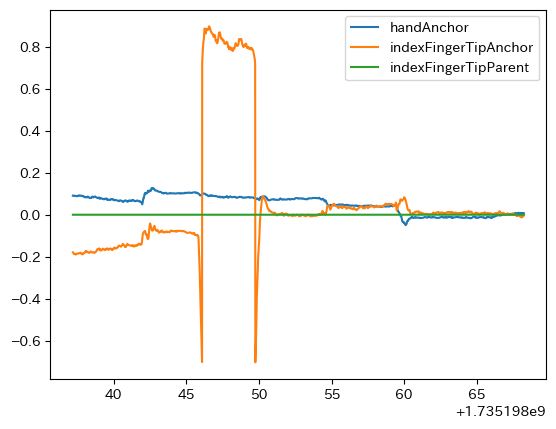

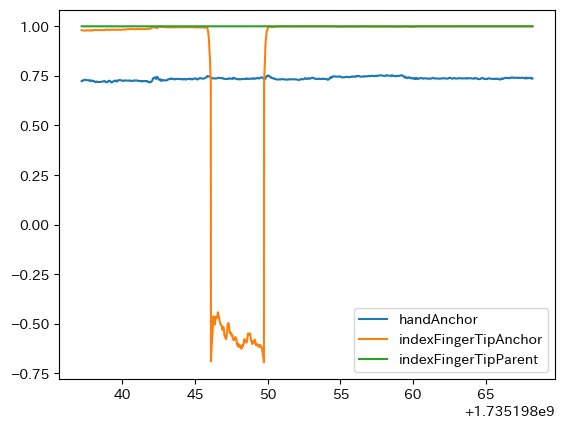

In [40]:
# それぞれプロット
fig = plt.figure()
plt.plot(df_handAnchor['time'], df_handAnchor['3x'], label='handAnchor')
plt.plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['3x'], label='indexFingerTipAnchor')
plt.plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['3x'], label='indexFingerTipParent')
plt.legend()
plt.show()

fig = plt.figure()
plt.plot(df_handAnchor['time'], df_handAnchor['3y'], label='handAnchor')
plt.plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['3y'], label='indexFingerTipAnchor')
plt.plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['3y'], label='indexFingerTipParent')
plt.legend()
plt.show()

fig = plt.figure()
plt.plot(df_handAnchor['time'], df_handAnchor['3z'], label='handAnchor')
plt.plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['3z'], label='indexFingerTipAnchor')
plt.plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['3z'], label='indexFingerTipParent')
plt.legend()
plt.show()

# それぞれのクォータニオンをプロット
fig = plt.figure()
plt.plot(df_handAnchor['time'], df_handAnchor['x'], label='handAnchor')
plt.plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['x'], label='indexFingerTipAnchor')
plt.plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['x'], label='indexFingerTipParent')
plt.legend()
plt.show()

fig = plt.figure()
plt.plot(df_handAnchor['time'], df_handAnchor['y'], label='handAnchor')
plt.plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['y'], label='indexFingerTipAnchor')
plt.plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['y'], label='indexFingerTipParent')
plt.legend()
plt.show()

fig = plt.figure()
plt.plot(df_handAnchor['time'], df_handAnchor['z'], label='handAnchor')
plt.plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['z'], label='indexFingerTipAnchor')
plt.plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['z'], label='indexFingerTipParent')
plt.legend()
plt.show()

fig = plt.figure()
plt.plot(df_handAnchor['time'], df_handAnchor['w'], label='handAnchor')
plt.plot(df_indexFingerTipAnchor['time'], df_indexFingerTipAnchor['w'], label='indexFingerTipAnchor')
plt.plot(df_indexFingerTipParent['time'], df_indexFingerTipParent['w'], label='indexFingerTipParent')
plt.legend()
plt.show()